In [1]:
#Librerias
##import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy.optimize import curve_fit
from scipy.signal import find_peaks,peak_widths
from scipy.special import wofz

In [2]:
#Actividad 1
I1 = np.array([1.5,1.5,1.6,1.3,1.6,1.9,2.0,2.3,2.4])
r1 = np.array([4.3,4.905,5.1,5.42,5.93,6.48,7.41,8.15,8.93])

#Actividad 2
I2 = np.array([1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0])
t2 = np.array([32.4,29.8,29.9,29.75,27.01,26.88,26.0,25.72,24.86,24.16,23.36])

#Actividad 3
fLarmor = 4.8 #Hertz
Data3T = np.array([9.98,9.09,7.74,6.48,4.74,3.90,3.53]) #Periodo de oscilación segundos
Data3I = np.array([1.0,1.5,2.0,2.5,3.0,3.5,4.0]) #Corriente en A

#Dato de conversión del campo magnético
Bconversion = 1.36*10**(-3)

#Datos generales de calibración 
M = 0.1413 #Kg
R = 0.0268 #m
f = 4.8 #Hz
g = 9.8 #m/s**2

#Obtener medidas de incertidumbre

#El r^2 de excel
def GetR2(x,y):
    matrix = np.corrcoef(x,y)
    R2 = (matrix[0,1])**2
    return R2

#Residuales 
#y es el de los datos
#ym es la de la regresion
def Residuals(y,ym):
    e = []
    for i in range(0,len(y)):
        e.append(y[i]-ym[i])
    return e

Para pasar los datos de corriente a campo magnético se hace la siguiente conversión:
$$B = 1.36 \times 10^{-3} \frac{T}{A} \cdot I$$

Actividad 1: Equilibrio estático

In [3]:
#Para regresiones lineales o polinómicas de cualquier orden
#Orden del polinomio
n = 1
B1 = Bconversion*I1
rmg = r1*M*g
parama1 = np.polyfit(B1, rmg, n)
_xa1 = np.linspace(min(B1),max(B1),len(B1))
yma1 = parama1[0]*_xa1 + parama1[1]

m1 = parama1[0]

print('La pendiente encontrada con la regresión fue m = {}'.format(m1))
#Obetner R^2
R2a1 = GetR2(B1,rmg)
#Desviacion estandar
stda1 = np.std(rmg)
#Varianza
vara1 = np.var(rmg)
#Residuales
Resa1 = Residuals(rmg,yma1)

La pendiente encontrada con la regresión fue m = 3932.6182397673897


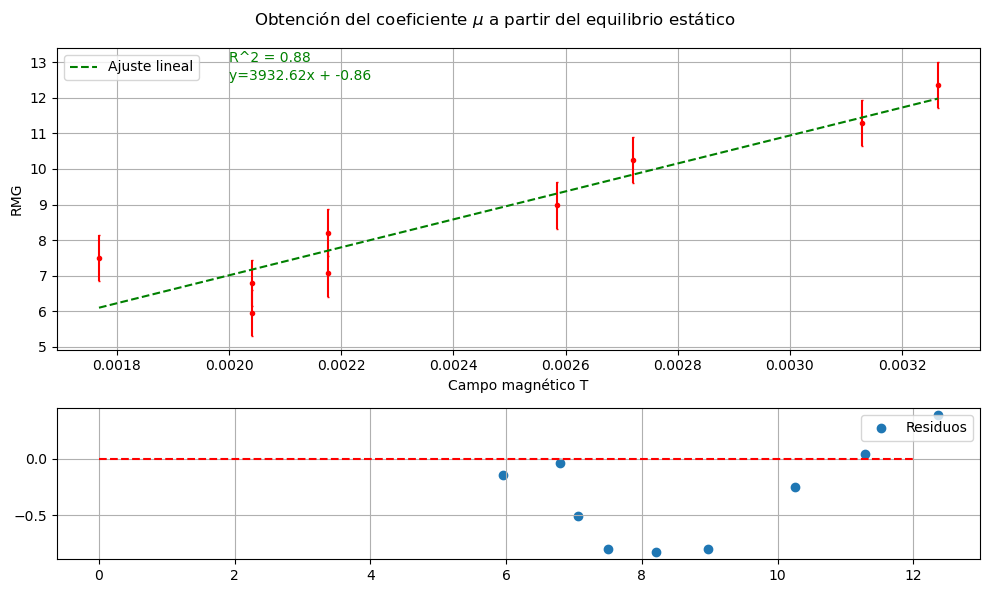

In [4]:
fig, axis = plt.subplots(2,1, figsize = (10, 6), gridspec_kw = {"height_ratios":[2, 1]})
ax1 = axis[0]
ax2 = axis[1]

fig.suptitle(r'Obtención del coeficiente $\mu$ a partir del equilibrio estático')

ax1.errorbar(B1,rmg,color='r',fmt='.',capsize=0.5,yerr=np.sqrt(vara1*0.1))
ax1.plot(_xa1,yma1,'--',color='g', label=r'Ajuste lineal')
ax1.set_xlabel(r"Campo magnético T")
ax1.set_ylabel(r'RMG')
ax1.text(0.0020, 12.5, 'y={}x + {}'.format(round(parama1[0],2),round(parama1[1],2)),color='g')
ax1.text(0.0020, 13, 'R^2 = {}'.format(round(R2a1,2)),color='g')
ax1.grid()
ax1.legend()

xresa1 = np.linspace(0,12,20)
ax2.scatter(rmg,Resa1,label = 'Residuos')
ax2.plot(xresa1,np.zeros_like(xresa1),'--',color='r')
ax2.grid()
ax2.legend()

fig.tight_layout()

Actividad 2

In [11]:
n = 1
B2 = []
for  i in I2:
    B2.append(1/(Bconversion*i))
T2 = t2**2 
parama2 = np.polyfit(B2, T2, n)
_xa2 = np.linspace(min(B2),max(B2),len(B2))
yma2 = parama2[0]*_xa2 + parama2[1]
m2 = parama2[0]

print('La pendiente encontrada con la regresión fue m = {}'.format(m2))
#Obetner R^2
R2a2 = GetR2(B2,T2)
#Desviacion estandar
stda2 = np.std(T2)
#Varianza
vara2 = np.var(T2)
#Residuales
Resa2 = Residuals(T2,yma2)

La pendiente encontrada con la regresión fue m = 1.285968450788164


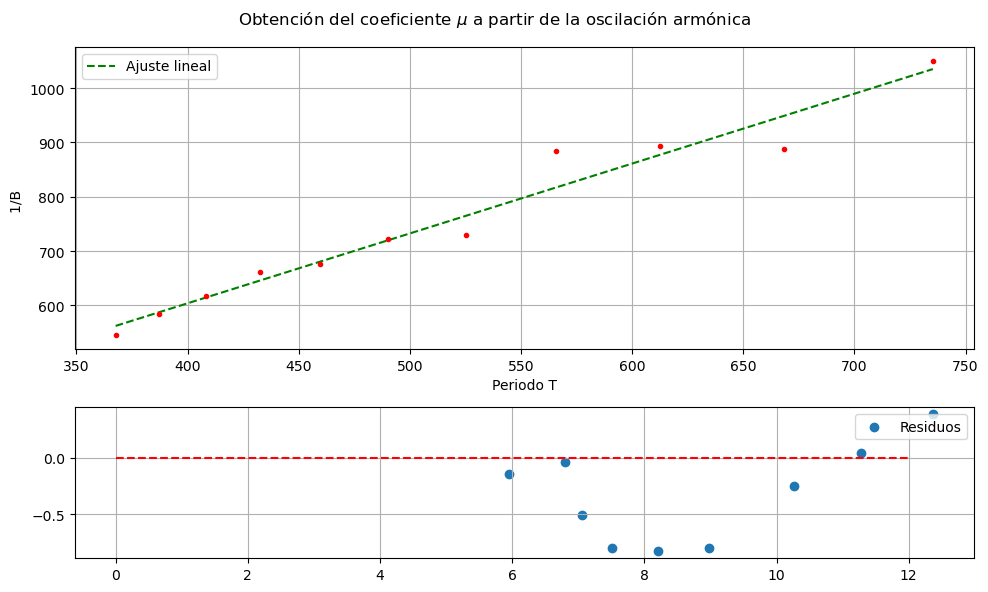

In [12]:


fig, axis = plt.subplots(2,1, figsize = (10, 6), gridspec_kw = {"height_ratios":[2, 1]})
ax1 = axis[0]
ax2 = axis[1]

fig.suptitle(r'Obtención del coeficiente $\mu$ a partir de la oscilación armónica')

ax1.errorbar(B2,T2,color='r',fmt='.',capsize=0.5,yerr=np.sqrt(vara1*0.1))
ax1.plot(_xa2,yma2,'--',color='g', label=r'Ajuste lineal')
ax1.set_xlabel(r"Periodo T")
ax1.set_ylabel(r'1/B ')
#ax1.text(0.0020, 11, 'y={}x + {}'.format(round(parama2[0],2),round(parama2[1],2)),color='g')
#ax1.text(0.0020, 2, 'R^2 = {}'.format(round(R2a2,2)),color='g')
ax1.grid()
ax1.legend()

xresa2 = np.linspace(0,12,20)
ax2.scatter(rmg,Resa1,label = 'Residuos')
ax2.plot(xresa2,np.zeros_like(xresa2),'--',color='r')
ax2.grid()
ax2.legend()

fig.tight_layout()


**Actividad 3: Precesión**

In [59]:
#Datos de campo magnetico convertidos
B3 = Data3I*Bconversion

#Frecuencia de Larmor es 2pi/T
Omega = []
for i in Data3T:
    Omega.append((2*np.pi)/i)

#Regresión lineal
param3a = np.polyfit(B3, Omega, 1)
_x3a = np.linspace(min(B3),max(B3),len(B3))
ym3a = param3a[0]*_x3a + param3a[1]
m = param3a[0]

print('La pendiente encontrada con la regresión fue m = {}'.format(m))

#Obetner R^2
R23a = GetR2(B3,Omega)
#Desviacion estandar
std3a = np.std(Omega)
#Varianza
var3a = np.var(Omega)
#Residuales
Res3a = Residuals(Omega,ym3a)

La pendiente encontrada con la regresión fue m = 304.8622508507495


0.18012049597336535

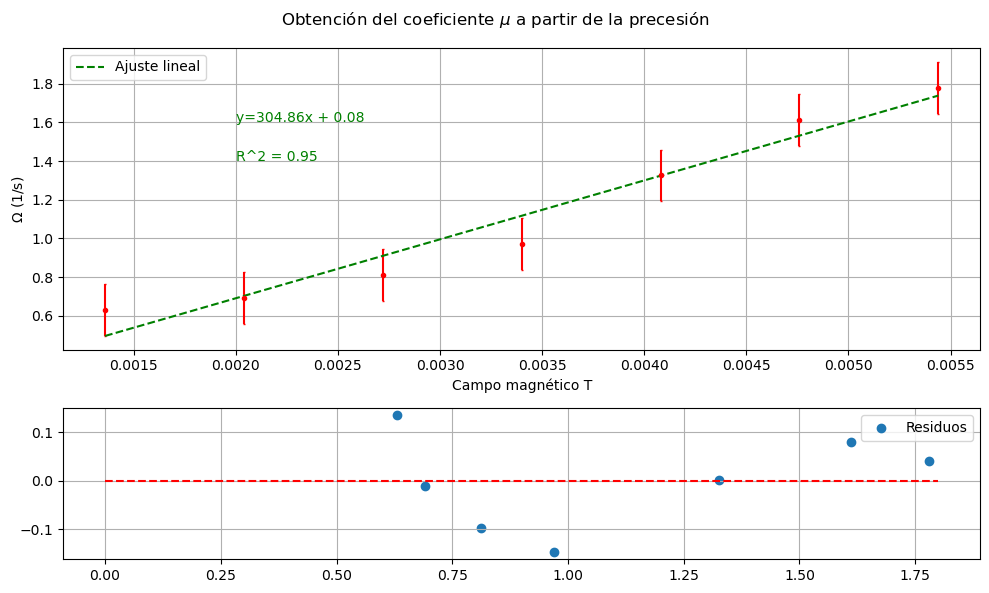

In [67]:
#Gráfico con residuos
fig, axis = plt.subplots(2,1, figsize = (10, 6), gridspec_kw = {"height_ratios":[2, 1]})
ax1 = axis[0]
ax2 = axis[1]

fig.suptitle(r'Obtención del coeficiente $\mu$ a partir de la precesión')

ax1.errorbar(B3,Omega,color='r',fmt='.',capsize=0.5,yerr=np.sqrt(var3a*0.1))
ax1.plot(_x3a,ym3a,'--',color='g', label=r'Ajuste lineal')
ax1.set_xlabel(r"Campo magnético T")
ax1.set_ylabel(r'$\Omega$ (1/s)')
ax1.text(0.0020, 1.6, 'y={}x + {}'.format(round(param3a[0],2),round(param3a[1],2)),color='g')
ax1.text(0.0020, 1.4, 'R^2 = {}'.format(round(R23a,2)),color='g')
ax1.grid()
ax1.legend()

xres3a = np.linspace(0,1.8,20)
ax2.scatter(Omega,Res3a,label = 'Residuos')
ax2.plot(xres3a,np.zeros_like(xres3a),'--',color='r')
ax2.grid()
ax2.legend()

fig.tight_layout()
# plt.savefig('Actividad 1.pdf')

Sin embargo, esta pendiente es $\mu/L_s$ por lo que para reportar $\mu$ hay que realizar un paso adicional. Sea m la pendiente de la gráfica:
$$ \mu = m L_s = mI\omega \quad \text{como se utilizó una esfera} \quad I=\frac{2}{5}MR^2  \quad \text{y} \quad \omega = 2 \pi f$$
$$ \rightarrow \quad \mu =\frac{4}{5}MR^2 m\pi f$$ 
Donde f es la frecuencia del estroboscopio $(4.8 \pm 0.1) Hz$; según la calibración $M = (141.3 \pm 0.05)g$ y $R = (2.68 \pm 0.05) cm$; y m la pendiente obtenida en la regresión lineal de la gráfica.

In [38]:
mu3a = (4/5)*M*(R**2)*np.pi*f*m
print('El valor encontrado para mu fue de {} con incertidumbre de {}'.format(round(mu3a,1),round(np.sqrt(std3a),1)))

El valor encontrado para mu fue de 0.4 con incertidumbre de 0.7
